# **EJERCICIO 1 Y 2**

a. Construya el polinomio por mínimos cuadrados de grado 1 y calcule el error.

b. Construya el polinomio por mínimos cuadrados de grado 2 y calcule el error.

c. Construya el polinomio por mínimos cuadrados de grado 3 y calcule el error.

d. Construya el polinomio por mínimos cuadrados de la forma 𝑏 y calcule el error.

e. Construya el polinomio por mínimos cuadrados de la forma 𝑏𝑥
 y calcule el error.


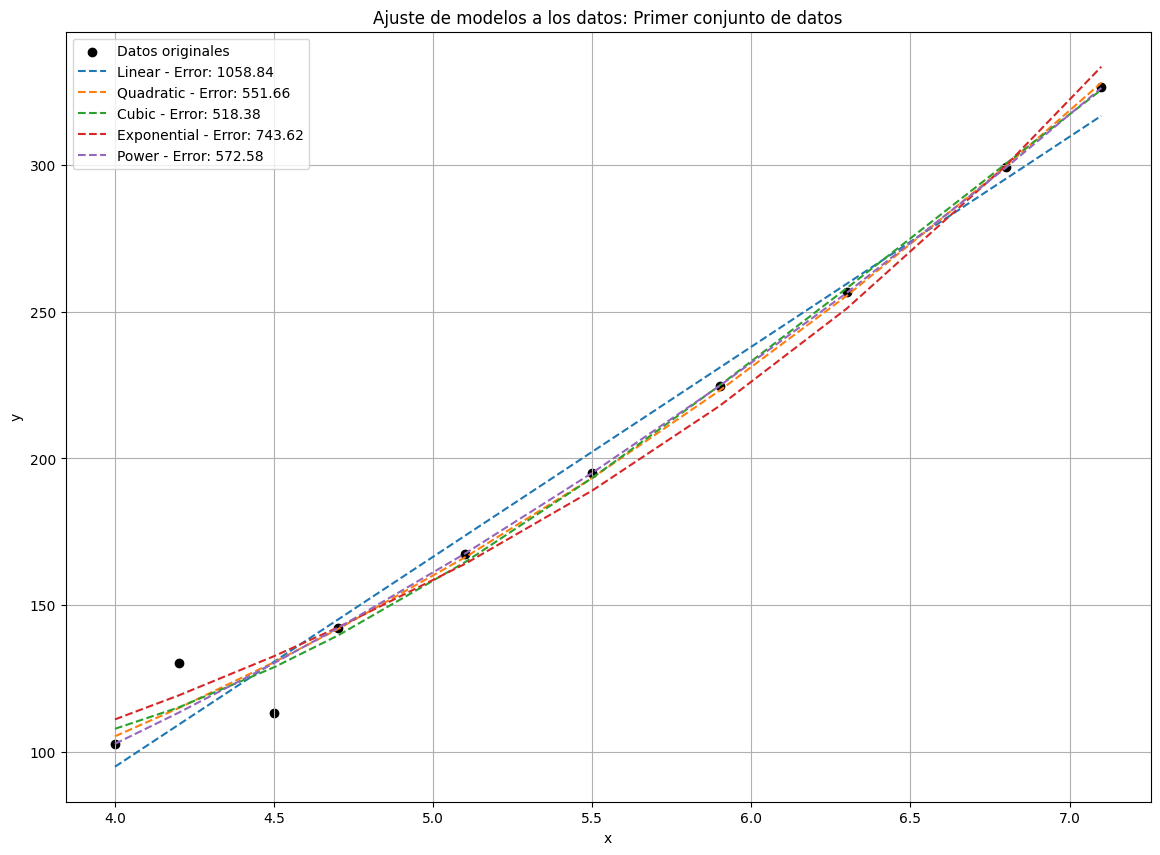

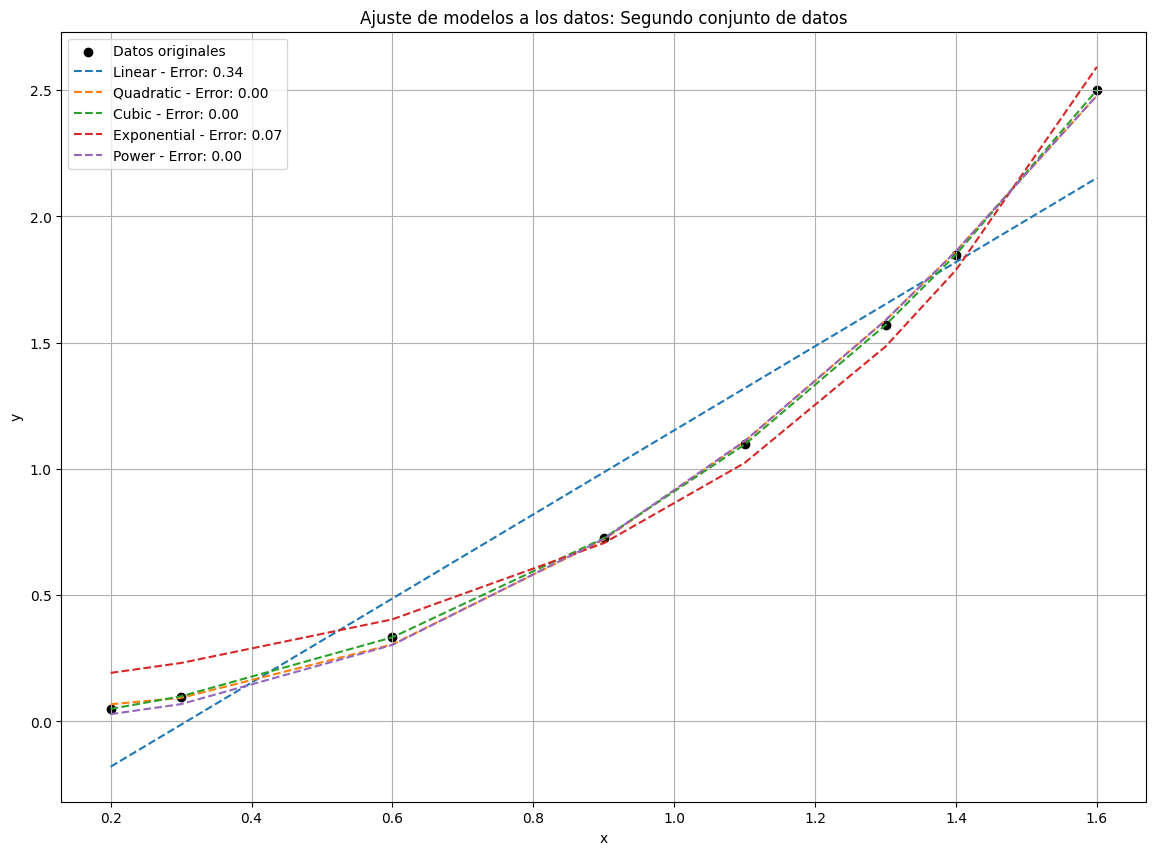

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Datos proporcionados (primer conjunto)
x1 = np.array([4.0, 4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1])
y1 = np.array([102.56, 130.11, 113.18, 142.05, 167.53, 195.14, 224.87, 256.73, 299.50, 326.72])

# Datos proporcionados (segundo conjunto)
x2 = np.array([0.2, 0.3, 0.6, 0.9, 1.1, 1.3, 1.4, 1.6])
y2 = np.array([0.050446, 0.098426, 0.33277, 0.72660, 1.0972, 1.5697, 1.8487, 2.5015])

# Funciones de ajuste de polinomios y modelos
def linear_polynomial(x, a0, a1):
    return a0 + a1 * x

def quadratic_polynomial(x, a0, a1, a2):
    return a0 + a1 * x + a2 * x**2

def cubic_polynomial(x, a0, a1, a2, a3):
    return a0 + a1 * x + a2 * x**2 + a3 * x**3

def exponential_model(x, a, b):
    return b * np.exp(a * x)

def power_model(x, a, b):
    return b * x ** a

# Función para ajustar modelos y calcular errores
def fit_models_and_calculate_errors(x, y):
    popt_linear, _ = curve_fit(linear_polynomial, x, y)
    y_linear_fit = linear_polynomial(x, *popt_linear)
    error_linear = np.sum((y - y_linear_fit) ** 2)

    popt_quadratic, _ = curve_fit(quadratic_polynomial, x, y)
    y_quadratic_fit = quadratic_polynomial(x, *popt_quadratic)
    error_quadratic = np.sum((y - y_quadratic_fit) ** 2)

    popt_cubic, _ = curve_fit(cubic_polynomial, x, y)
    y_cubic_fit = cubic_polynomial(x, *popt_cubic)
    error_cubic = np.sum((y - y_cubic_fit) ** 2)

    popt_exponential, _ = curve_fit(exponential_model, x, y, p0=(0.1, 100))
    y_exponential_fit = exponential_model(x, *popt_exponential)
    error_exponential = np.sum((y - y_exponential_fit) ** 2)

    popt_power, _ = curve_fit(power_model, x, y, p0=(0.1, 100))
    y_power_fit = power_model(x, *popt_power)
    error_power = np.sum((y - y_power_fit) ** 2)

    return {
        "linear": (popt_linear, y_linear_fit, error_linear),
        "quadratic": (popt_quadratic, y_quadratic_fit, error_quadratic),
        "cubic": (popt_cubic, y_cubic_fit, error_cubic),
        "exponential": (popt_exponential, y_exponential_fit, error_exponential),
        "power": (popt_power, y_power_fit, error_power),
    }

# Ajustar y graficar para ambos conjuntos de datos
for i, (x, y, title) in enumerate([(x1, y1, 'Primer conjunto de datos'), (x2, y2, 'Segundo conjunto de datos')]):
    results = fit_models_and_calculate_errors(x, y)

    plt.figure(figsize=(14, 10))

    # Datos originales
    plt.scatter(x, y, color='black', label='Datos originales')

    # Ajustes
    for model_name, (popt, y_fit, error) in results.items():
        plt.plot(x, y_fit, label=f'{model_name.capitalize()} - Error: {error:.2f}', linestyle='--')

    # Configuración de la gráfica
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Ajuste de modelos a los datos: {title}')
    plt.legend()
    plt.grid(True)
    plt.show()


# **EJERCICIO 3 Y 4**

3. La siguiente tabla muestra los promedios de puntos del colegio de 20 especialistas en matemáticas y ciencias
computacionales, junto con las calificaciones que recibieron estos estudiantes en la parte de matemáticas de
la prueba ACT (Programa de Pruebas de Colegios Americanos) mientras estaban en secundaria. Grafique
estos datos y encuentre la ecuación de la recta por mínimos cuadrados para estos datos.


4. El siguiente conjunto de datos, presentado al Subcomité Antimonopolio del Senado, muestra las
características comparativas de supervivencia durante un choque de automóviles de diferentes clases.
Encuentre la recta por mínimos cuadrados que aproxima estos datos (la tabla muestra el porcentaje de
vehículos que participaron en un accidente en los que la lesión más grave fue fatal o seria).



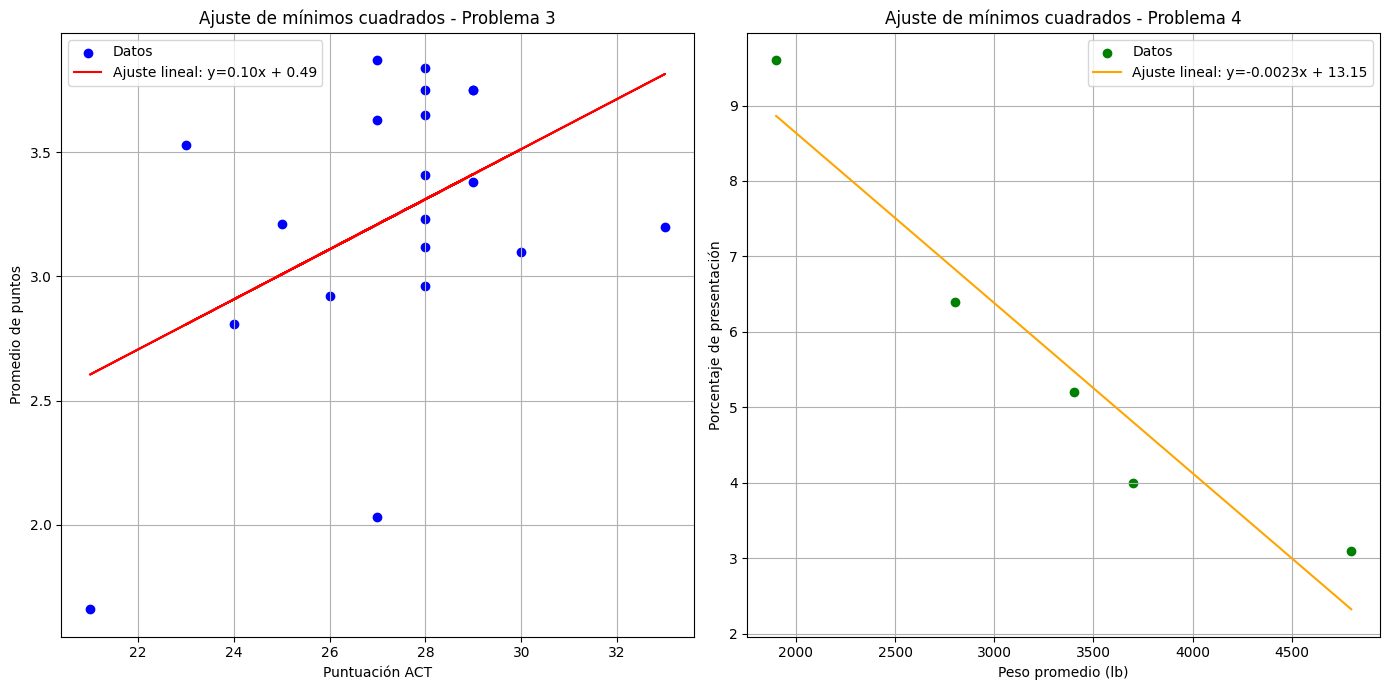

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Datos del problema 3
act_scores = np.array([28, 25, 28, 27, 28, 33, 28, 29, 23, 27, 29, 28, 27, 29, 21, 28, 28, 26, 30, 24])
average_scores = np.array([3.84, 3.21, 3.23, 3.63, 3.75, 3.20, 3.41, 3.38, 3.53, 2.03, 3.75, 3.65, 3.87, 3.75, 1.66, 3.12, 2.96, 2.92, 3.10, 2.81])

# Ajuste de mínimos cuadrados
slope3, intercept3, r_value3, p_value3, std_err3 = linregress(act_scores, average_scores)
line3 = slope3 * act_scores + intercept3

# Graficar los datos y la línea ajustada
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(act_scores, average_scores, color='blue', label='Datos')
plt.plot(act_scores, line3, color='red', label=f'Ajuste lineal: y={slope3:.2f}x + {intercept3:.2f}')
plt.xlabel('Puntuación ACT')
plt.ylabel('Promedio de puntos')
plt.title('Ajuste de mínimos cuadrados - Problema 3')
plt.legend()
plt.grid(True)

# Datos del problema 4
weights = np.array([4800, 3700, 3400, 2800, 1900])
presentations = np.array([3.1, 4.0, 5.2, 6.4, 9.6])

# Ajuste de mínimos cuadrados
slope4, intercept4, r_value4, p_value4, std_err4 = linregress(weights, presentations)
line4 = slope4 * weights + intercept4

# Graficar los datos y la línea ajustada
plt.subplot(1, 2, 2)
plt.scatter(weights, presentations, color='green', label='Datos')
plt.plot(weights, line4, color='orange', label=f'Ajuste lineal: y={slope4:.4f}x + {intercept4:.2f}')
plt.xlabel('Peso promedio (lb)')
plt.ylabel('Porcentaje de presentación')
plt.title('Ajuste de mínimos cuadrados - Problema 4')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
